In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

raw_bj_dataset = pd.read_csv('datasets/blkjckhands.csv')


# raw_bj_dataset = raw_bj_dataset[:20]

# n = 900000
# action_row = [[] for _ in range(n)]
action_row = []
rows_to_del = []
# raw_bj_dataset

raw_bj_dataset['action'] = raw_bj_dataset['card1']

updated = (raw_bj_dataset['ply2cardsum'] != raw_bj_dataset['sumofcards'])
raw_bj_dataset.loc[updated, 'action'] = 'Hit'

updated = (raw_bj_dataset['ply2cardsum'] == raw_bj_dataset['sumofcards'])
raw_bj_dataset.loc[updated, 'action'] = 'Stay'

raw_bj_dataset = raw_bj_dataset[raw_bj_dataset.winloss == "Win"]         
        
raw_bj_dataset = raw_bj_dataset.drop(rows_to_del)
bj_dataset = raw_bj_dataset.drop(columns=["Unnamed: 0", "PlayerNo", "card1", "card2", "card3", "card4", "card5", "sumofcards", 
                                   "dealcard2", "dealcard3", "dealcard4", "dealcard5",
                                  "sumofdeal", "blkjck", "plybustbeat", "dlbustbeat", "plwinamt", "dlwinamt", "winloss"])
bj_dataset

,dealcard1,ply2cardsum,action
1,10,19,Stay
6,4,14,Stay
7,4,13,Stay
8,4,12,Stay
9,4,15,Stay
...,...,...,...
899985,6,21,Stay
899986,6,19,Stay
899987,6,9,Hit
899994,3,20,Stay


In [2]:
X = bj_dataset.drop(columns=["action"])
y  = bj_dataset["action"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = DecisionTreeClassifier()

model.fit(X_train, y_train)
# model.fit(X, y)
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

0.9809042622101308

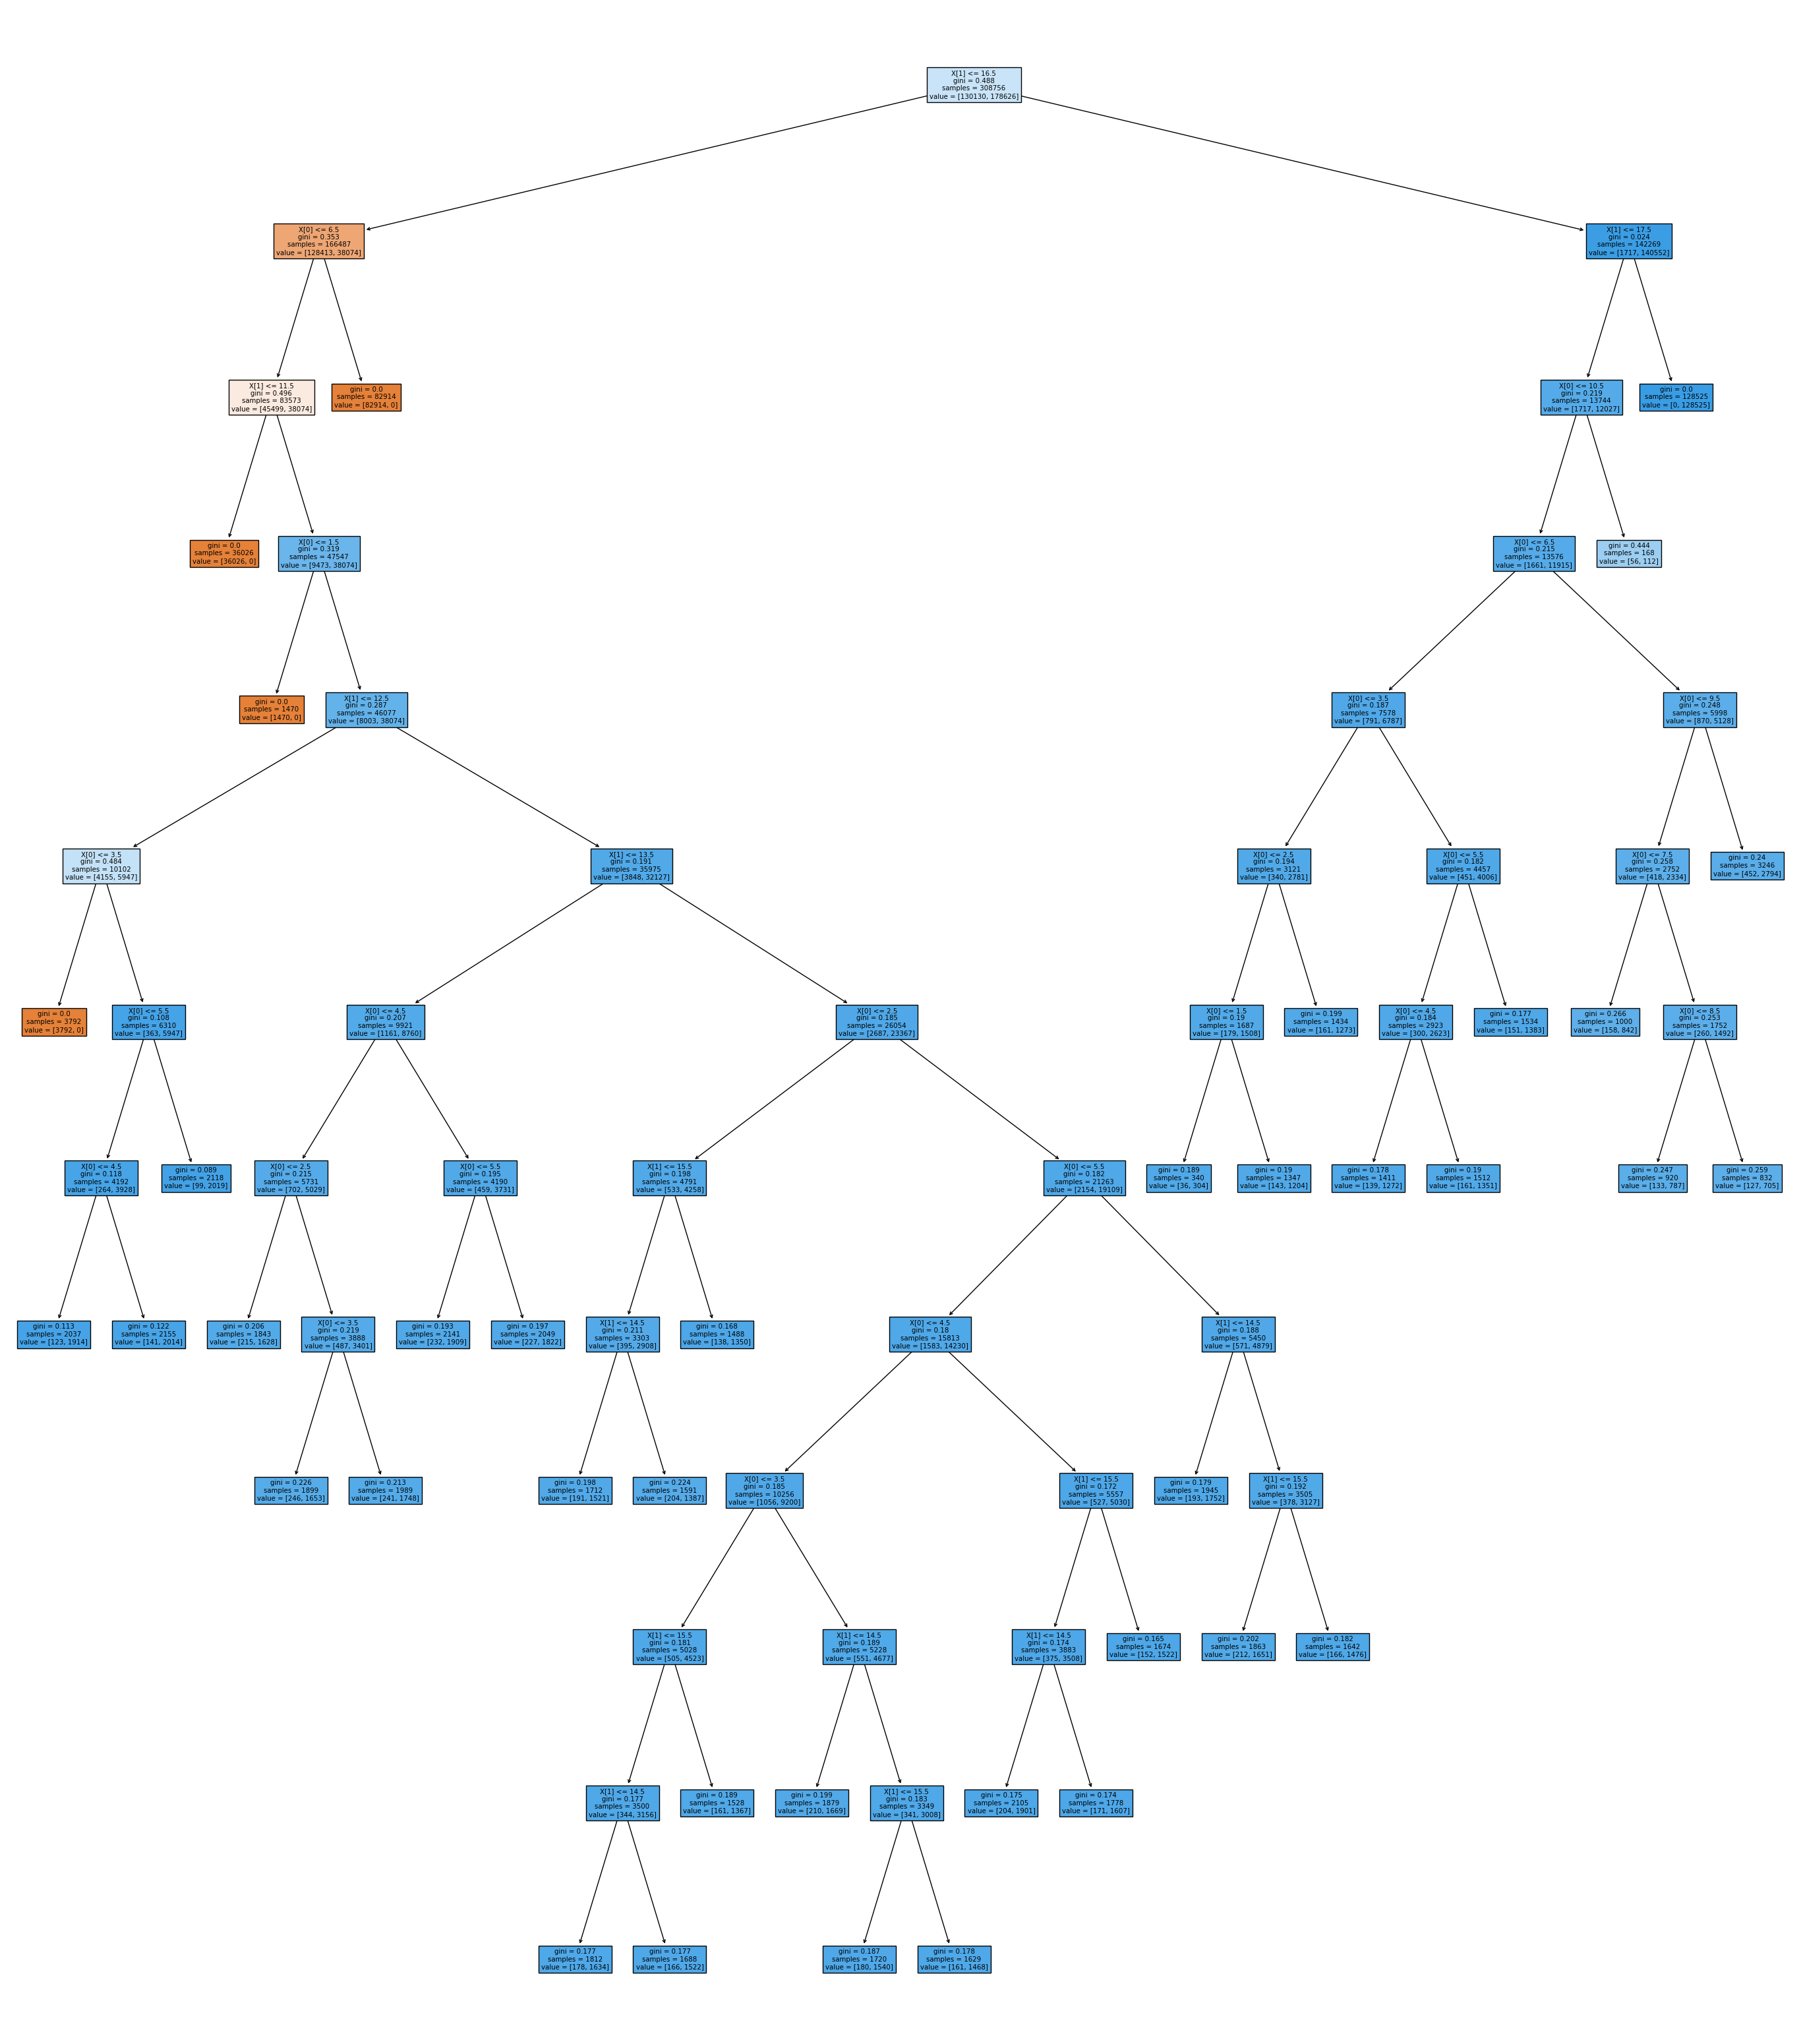

In [3]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(35,40))

iris = load_iris()
_ = tree.plot_tree(model, filled=True)


In [4]:
def predict(user_dealcard, user_playercard):
    y_user = pd.DataFrame({'dealcard1':[user_dealcard],
                       'ply2cardsum': [user_playercard]})
    predictions = model.predict(y_user)
    return predictions

In [94]:
import random
# user_dealcard = input("Input dealer card: ")
# user_playercard = input("Input your card sum: ")

# predict(user_dealcard, user_playercard)

global win_count, loose_count

win_count = 0
loose_count = 0

def lost_game(dealer_sum, player_sum):
    global loose_count
    print("lost")
    print("Dealer sum", dealer_sum, "Player sum", player_sum)
    loose_count+=1
    print(loose_count)

def won_game(dealer_sum, player_sum):
    global win_count
    print("won")
    print("Dealer sum", dealer_sum, "Player sum", player_sum)
    win_count+=1
    print(win_count)

def isAce(num):
    if(num == 1):
        return True
    else:
        return False 
    
def calculate_hand_sum(hand):
    has_ace = False
    hand_sum = 0
    for i in hand:
        if(isAce(i)):
            has_ace = True
        hand_sum+=i
        
    if(has_ace and hand_sum <= 11):
        hand_sum += 10
        
    return hand_sum

def setup_game():
    original_deck = [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 
        7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
    
    random_int = 0
    player_hand = []
    dealer_hand = []
    deck = original_deck
    random.shuffle(deck)
    
    for i in range(0, 2):
        random_int = random.randint(0, len(deck)-1)
        player_hand.append(deck[random_int])
        deck.pop(random_int)
        random_int = random.randint(0, len(deck)-1)
        dealer_hand.append(deck[random_int])
        deck.pop(random_int)
        
    random_int = random.randint(0, len(dealer_hand)-1)
    showed_card = dealer_hand[random_int]
    return player_hand, dealer_hand, showed_card, deck

def get_another_card(player_hand, dealer_hand, showed_card, deck):
    random_int = random.randint(0, len(deck)-1)
    player_hand.append(deck[random_int])
    deck.pop(random_int)
    
    player_sum = calculate_hand_sum(player_hand)
    dealer_sum = calculate_hand_sum(dealer_hand)
    
    if(calculate_hand_sum(player_hand) > 21):
        lost_game(dealer_sum, player_sum)
        return
    
    if(dealer_sum < 17):
        random_int = random.randint(0, len(deck)-1)
        dealer_hand.append(deck[random_int])
        deck.pop(random_int)
        dealer_sum = calculate_hand_sum(dealer_hand)
        if(dealer_sum > 21):
            won_game(dealer_sum, player_sum)
            return
        
    new_round(player_hand, dealer_hand, showed_card, deck)
    
def finish_game(player_hand, dealer_hand):
    dealer_sum = calculate_hand_sum(dealer_hand)
    player_sum = calculate_hand_sum(player_hand)
    if(dealer_sum > player_sum):
        lost_game(dealer_sum, player_sum)
    else:
        won_game(dealer_sum, player_sum)

In [95]:
def start_game():
    player_hand, dealer_hand, showed_card, deck = setup_game()
    player_sum = calculate_hand_sum(player_hand)
    
    if(isAce(showed_card)):
        showed_card = 11
    return player_hand, dealer_hand, showed_card, deck
    
def game_first_round():
    player_hand, dealer_hand, showed_card, deck = start_game()
    player_sum = calculate_hand_sum(player_hand)
    dealer_sum = calculate_hand_sum(dealer_hand)
    
    if(player_sum > 21):
        lost_game(dealer_sum, player_sum)
        return
    
    if(dealer_sum > 21):
        won_game(dealer_sum, player_sum)
        return
    
    action = predict(showed_card, player_sum)[0]
    print("Showed card", showed_card, "Player sum", player_sum, "Action is", action)
#     action = input("Input your action: ")
    if(action == "Hit"):
        get_another_card(player_hand, dealer_hand, showed_card, deck)
    else:
        finish_game(player_hand, dealer_hand)

def new_round(player_hand, dealer_hand, showed_card, deck):
    player_sum = calculate_hand_sum(player_hand)
    action = predict(showed_card, player_sum)[0]
    print("Showed card", showed_card, "Player sum", player_sum, "Action is", action)
#     action = input("Input your action: ")
    if(action == "Hit"):
        get_another_card(player_hand, dealer_hand, showed_card, deck)
    else:
        finish_game(player_hand, dealer_hand)

for i in range(0, 5000):
    game_first_round()
print(win_count, loose_count)

Showed card 10 Player sum 13 Action is Hit
lost
Dealer sum 21 Player sum 23
1
Showed card 10 Player sum 17 Action is Stay
won
Dealer sum 14 Player sum 17
1
Showed card 7 Player sum 17 Action is Stay
won
Dealer sum 13 Player sum 17
2
Showed card 9 Player sum 15 Action is Hit
won
Dealer sum 22 Player sum 19
3
Showed card 5 Player sum 8 Action is Hit
won
Dealer sum 22 Player sum 19
4
Showed card 8 Player sum 18 Action is Stay
won
Dealer sum 17 Player sum 18
5
Showed card 2 Player sum 12 Action is Hit
Showed card 2 Player sum 21 Action is Stay
won
Dealer sum 20 Player sum 21
6
Showed card 6 Player sum 13 Action is Stay
lost
Dealer sum 15 Player sum 13
2
Showed card 6 Player sum 13 Action is Stay
lost
Dealer sum 16 Player sum 13
3
Showed card 10 Player sum 20 Action is Stay
won
Dealer sum 12 Player sum 20
7
Showed card 7 Player sum 16 Action is Hit
lost
Dealer sum 10 Player sum 25
4
Showed card 2 Player sum 12 Action is Hit
Showed card 2 Player sum 13 Action is Stay
lost
Dealer sum 21 Playe

Showed card 2 Player sum 18 Action is Stay
won
Dealer sum 12 Player sum 18
205
Showed card 6 Player sum 12 Action is Stay
won
Dealer sum 9 Player sum 12
206
Showed card 10 Player sum 8 Action is Hit
won
Dealer sum 24 Player sum 10
207
Showed card 7 Player sum 21 Action is Stay
won
Dealer sum 17 Player sum 21
208
Showed card 10 Player sum 11 Action is Hit
Showed card 10 Player sum 13 Action is Hit
Showed card 10 Player sum 19 Action is Stay
lost
Dealer sum 20 Player sum 19
112
Showed card 8 Player sum 13 Action is Hit
Showed card 8 Player sum 20 Action is Stay
won
Dealer sum 18 Player sum 20
209
Showed card 9 Player sum 17 Action is Stay
won
Dealer sum 15 Player sum 17
210
Showed card 6 Player sum 14 Action is Stay
won
Dealer sum 9 Player sum 14
211
Showed card 4 Player sum 15 Action is Stay
won
Dealer sum 7 Player sum 15
212
Showed card 11 Player sum 11 Action is Hit
Showed card 11 Player sum 18 Action is Stay
lost
Dealer sum 21 Player sum 18
113
Showed card 6 Player sum 20 Action is S

Showed card 3 Player sum 14 Action is Stay
won
Dealer sum 12 Player sum 14
384
Showed card 10 Player sum 12 Action is Hit
Showed card 10 Player sum 15 Action is Hit
lost
Dealer sum 17 Player sum 25
206
Showed card 10 Player sum 12 Action is Hit
Showed card 10 Player sum 14 Action is Hit
Showed card 10 Player sum 21 Action is Stay
won
Dealer sum 20 Player sum 21
385
Showed card 10 Player sum 13 Action is Hit
won
Dealer sum 22 Player sum 15
386
Showed card 4 Player sum 9 Action is Hit
Showed card 4 Player sum 19 Action is Stay
won
Dealer sum 19 Player sum 19
387
Showed card 8 Player sum 18 Action is Stay
won
Dealer sum 18 Player sum 18
388
Showed card 10 Player sum 19 Action is Stay
lost
Dealer sum 20 Player sum 19
207
Showed card 6 Player sum 17 Action is Stay
won
Dealer sum 16 Player sum 17
389
Showed card 9 Player sum 14 Action is Hit
lost
Dealer sum 19 Player sum 24
208
Showed card 10 Player sum 19 Action is Stay
won
Dealer sum 13 Player sum 19
390
Showed card 6 Player sum 18 Action 

Showed card 9 Player sum 17 Action is Stay
lost
Dealer sum 20 Player sum 17
272
Showed card 10 Player sum 12 Action is Hit
Showed card 10 Player sum 16 Action is Hit
Showed card 10 Player sum 16 Action is Hit
lost
Dealer sum 19 Player sum 25
273
Showed card 10 Player sum 17 Action is Stay
won
Dealer sum 14 Player sum 17
514
Showed card 10 Player sum 17 Action is Stay
lost
Dealer sum 20 Player sum 17
274
Showed card 10 Player sum 15 Action is Hit
lost
Dealer sum 16 Player sum 25
275
Showed card 8 Player sum 8 Action is Hit
Showed card 8 Player sum 18 Action is Stay
won
Dealer sum 17 Player sum 18
515
Showed card 10 Player sum 20 Action is Stay
won
Dealer sum 20 Player sum 20
516
Showed card 4 Player sum 12 Action is Stay
lost
Dealer sum 13 Player sum 12
276
Showed card 11 Player sum 14 Action is Hit
Showed card 11 Player sum 17 Action is Stay
lost
Dealer sum 18 Player sum 17
277
Showed card 10 Player sum 13 Action is Hit
Showed card 10 Player sum 21 Action is Stay
won
Dealer sum 20 Play

Showed card 10 Player sum 19 Action is Stay
lost
Dealer sum 20 Player sum 19
357
Showed card 5 Player sum 18 Action is Stay
won
Dealer sum 9 Player sum 18
675
Showed card 6 Player sum 20 Action is Stay
won
Dealer sum 17 Player sum 20
676
Showed card 4 Player sum 13 Action is Stay
won
Dealer sum 13 Player sum 13
677
Showed card 8 Player sum 13 Action is Hit
lost
Dealer sum 12 Player sum 23
358
Showed card 10 Player sum 13 Action is Hit
Showed card 10 Player sum 17 Action is Stay
lost
Dealer sum 19 Player sum 17
359
Showed card 10 Player sum 17 Action is Stay
lost
Dealer sum 20 Player sum 17
360
Showed card 8 Player sum 19 Action is Stay
won
Dealer sum 18 Player sum 19
678
Showed card 6 Player sum 13 Action is Stay
lost
Dealer sum 16 Player sum 13
361
Showed card 5 Player sum 18 Action is Stay
won
Dealer sum 16 Player sum 18
679
Showed card 2 Player sum 12 Action is Hit
lost
Dealer sum 6 Player sum 22
362
Showed card 3 Player sum 13 Action is Stay
won
Dealer sum 13 Player sum 13
680
Show

Showed card 3 Player sum 20 Action is Stay
won
Dealer sum 6 Player sum 20
860
Showed card 2 Player sum 8 Action is Hit
Showed card 2 Player sum 18 Action is Stay
lost
Dealer sum 20 Player sum 18
467
Showed card 4 Player sum 20 Action is Stay
won
Dealer sum 12 Player sum 20
861
Showed card 3 Player sum 18 Action is Stay
won
Dealer sum 13 Player sum 18
862
Showed card 7 Player sum 17 Action is Stay
won
Dealer sum 17 Player sum 17
863
Showed card 11 Player sum 12 Action is Hit
Showed card 11 Player sum 21 Action is Stay
won
Dealer sum 13 Player sum 21
864
Showed card 2 Player sum 7 Action is Hit
won
Dealer sum 22 Player sum 14
865
Showed card 8 Player sum 16 Action is Hit
lost
Dealer sum 18 Player sum 23
468
Showed card 3 Player sum 14 Action is Stay
won
Dealer sum 13 Player sum 14
866
Showed card 10 Player sum 12 Action is Hit
Showed card 10 Player sum 15 Action is Hit
lost
Dealer sum 20 Player sum 24
469
Showed card 2 Player sum 14 Action is Stay
won
Dealer sum 5 Player sum 14
867
Showe

Showed card 7 Player sum 19 Action is Stay
won
Dealer sum 17 Player sum 19
1072
Showed card 3 Player sum 14 Action is Stay
won
Dealer sum 5 Player sum 14
1073
Showed card 11 Player sum 9 Action is Hit
Showed card 11 Player sum 19 Action is Stay
won
Dealer sum 14 Player sum 19
1074
Showed card 10 Player sum 14 Action is Hit
lost
Dealer sum 19 Player sum 24
572
Showed card 6 Player sum 7 Action is Hit
Showed card 6 Player sum 17 Action is Stay
won
Dealer sum 17 Player sum 17
1075
Showed card 5 Player sum 15 Action is Stay
won
Dealer sum 13 Player sum 15
1076
Showed card 6 Player sum 19 Action is Stay
won
Dealer sum 11 Player sum 19
1077
Showed card 7 Player sum 17 Action is Stay
lost
Dealer sum 18 Player sum 17
573
Showed card 3 Player sum 18 Action is Stay
won
Dealer sum 6 Player sum 18
1078
Showed card 8 Player sum 12 Action is Hit
Showed card 8 Player sum 15 Action is Hit
lost
Dealer sum 18 Player sum 24
574
Showed card 10 Player sum 15 Action is Hit
won
Dealer sum 23 Player sum 19
10

Showed card 8 Player sum 14 Action is Hit
lost
Dealer sum 18 Player sum 24
730
Showed card 5 Player sum 15 Action is Stay
won
Dealer sum 12 Player sum 15
1384
Showed card 11 Player sum 20 Action is Stay
won
Dealer sum 20 Player sum 20
1385
Showed card 8 Player sum 14 Action is Hit
Showed card 8 Player sum 17 Action is Stay
lost
Dealer sum 18 Player sum 17
731
Showed card 10 Player sum 12 Action is Hit
Showed card 10 Player sum 13 Action is Hit
Showed card 10 Player sum 16 Action is Hit
Showed card 10 Player sum 18 Action is Stay
lost
Dealer sum 21 Player sum 18
732
Showed card 3 Player sum 21 Action is Stay
won
Dealer sum 12 Player sum 21
1386
Showed card 8 Player sum 13 Action is Hit
lost
Dealer sum 16 Player sum 23
733
Showed card 8 Player sum 13 Action is Hit
Showed card 8 Player sum 13 Action is Hit
Showed card 8 Player sum 19 Action is Stay
won
Dealer sum 18 Player sum 19
1387
Showed card 5 Player sum 15 Action is Stay
won
Dealer sum 10 Player sum 15
1388
Showed card 7 Player sum 

Showed card 10 Player sum 13 Action is Hit
won
Dealer sum 23 Player sum 17
1547
Showed card 11 Player sum 17 Action is Stay
won
Dealer sum 17 Player sum 17
1548
Showed card 10 Player sum 9 Action is Hit
Showed card 10 Player sum 11 Action is Hit
Showed card 10 Player sum 21 Action is Stay
won
Dealer sum 16 Player sum 21
1549
Showed card 7 Player sum 17 Action is Stay
won
Dealer sum 17 Player sum 17
1550
Showed card 6 Player sum 6 Action is Hit
Showed card 6 Player sum 11 Action is Hit
Showed card 6 Player sum 21 Action is Stay
won
Dealer sum 18 Player sum 21
1551
Showed card 8 Player sum 18 Action is Stay
won
Dealer sum 18 Player sum 18
1552
Showed card 4 Player sum 20 Action is Stay
won
Dealer sum 9 Player sum 20
1553
Showed card 7 Player sum 14 Action is Hit
Showed card 7 Player sum 21 Action is Stay
won
Dealer sum 13 Player sum 21
1554
Showed card 4 Player sum 13 Action is Stay
won
Dealer sum 8 Player sum 13
1555
Showed card 11 Player sum 13 Action is Hit
Showed card 11 Player sum 1

Showed card 11 Player sum 21 Action is Stay
won
Dealer sum 20 Player sum 21
1756
Showed card 10 Player sum 14 Action is Hit
lost
Dealer sum 20 Player sum 24
941
Showed card 9 Player sum 10 Action is Hit
Showed card 9 Player sum 16 Action is Hit
lost
Dealer sum 19 Player sum 22
942
Showed card 8 Player sum 13 Action is Hit
won
Dealer sum 22 Player sum 20
1757
Showed card 8 Player sum 13 Action is Hit
Showed card 8 Player sum 17 Action is Stay
lost
Dealer sum 19 Player sum 17
943
Showed card 6 Player sum 15 Action is Stay
won
Dealer sum 12 Player sum 15
1758
Showed card 6 Player sum 15 Action is Stay
lost
Dealer sum 16 Player sum 15
944
Showed card 3 Player sum 14 Action is Stay
won
Dealer sum 13 Player sum 14
1759
Showed card 10 Player sum 12 Action is Hit
Showed card 10 Player sum 19 Action is Stay
won
Dealer sum 18 Player sum 19
1760
Showed card 4 Player sum 19 Action is Stay
won
Dealer sum 9 Player sum 19
1761
Showed card 11 Player sum 17 Action is Stay
won
Dealer sum 13 Player sum 1

Showed card 10 Player sum 17 Action is Stay
lost
Dealer sum 20 Player sum 17
1018
Showed card 2 Player sum 11 Action is Hit
Showed card 2 Player sum 17 Action is Stay
lost
Dealer sum 20 Player sum 17
1019
Showed card 11 Player sum 18 Action is Stay
won
Dealer sum 13 Player sum 18
1890
Showed card 9 Player sum 15 Action is Hit
lost
Dealer sum 19 Player sum 25
1020
Showed card 10 Player sum 18 Action is Stay
won
Dealer sum 15 Player sum 18
1891
Showed card 2 Player sum 18 Action is Stay
won
Dealer sum 8 Player sum 18
1892
Showed card 10 Player sum 10 Action is Hit
won
Dealer sum 23 Player sum 20
1893
Showed card 10 Player sum 14 Action is Hit
Showed card 10 Player sum 19 Action is Stay
won
Dealer sum 18 Player sum 19
1894
Showed card 10 Player sum 12 Action is Hit
Showed card 10 Player sum 16 Action is Hit
lost
Dealer sum 17 Player sum 23
1021
Showed card 7 Player sum 21 Action is Stay
won
Dealer sum 12 Player sum 21
1895
Showed card 10 Player sum 13 Action is Hit
Showed card 10 Player s

Showed card 10 Player sum 11 Action is Hit
Showed card 10 Player sum 20 Action is Stay
won
Dealer sum 20 Player sum 20
1993
Showed card 8 Player sum 21 Action is Stay
won
Dealer sum 19 Player sum 21
1994
Showed card 10 Player sum 16 Action is Hit
lost
Dealer sum 12 Player sum 26
1081
Showed card 10 Player sum 17 Action is Stay
lost
Dealer sum 18 Player sum 17
1082
Showed card 10 Player sum 12 Action is Hit
Showed card 10 Player sum 20 Action is Stay
won
Dealer sum 17 Player sum 20
1995
Showed card 5 Player sum 20 Action is Stay
won
Dealer sum 7 Player sum 20
1996
Showed card 11 Player sum 14 Action is Hit
lost
Dealer sum 20 Player sum 23
1083
Showed card 9 Player sum 16 Action is Hit
Showed card 9 Player sum 17 Action is Stay
won
Dealer sum 15 Player sum 17
1997
Showed card 9 Player sum 20 Action is Stay
won
Dealer sum 18 Player sum 20
1998
Showed card 10 Player sum 13 Action is Hit
Showed card 10 Player sum 14 Action is Hit
lost
Dealer sum 19 Player sum 24
1084
Showed card 10 Player s

Showed card 10 Player sum 12 Action is Hit
Showed card 10 Player sum 21 Action is Stay
won
Dealer sum 20 Player sum 21
2139
Showed card 2 Player sum 16 Action is Stay
won
Dealer sum 6 Player sum 16
2140
Showed card 11 Player sum 17 Action is Stay
won
Dealer sum 15 Player sum 17
2141
Showed card 10 Player sum 14 Action is Hit
Showed card 10 Player sum 19 Action is Stay
lost
Dealer sum 20 Player sum 19
1170
Showed card 10 Player sum 15 Action is Hit
lost
Dealer sum 20 Player sum 25
1171
Showed card 3 Player sum 12 Action is Hit
Showed card 3 Player sum 16 Action is Stay
lost
Dealer sum 17 Player sum 16
1172
Showed card 4 Player sum 19 Action is Stay
won
Dealer sum 6 Player sum 19
2142
Showed card 3 Player sum 13 Action is Stay
won
Dealer sum 13 Player sum 13
2143
Showed card 2 Player sum 13 Action is Stay
won
Dealer sum 12 Player sum 13
2144
Showed card 7 Player sum 6 Action is Hit
Showed card 7 Player sum 11 Action is Hit
Showed card 7 Player sum 12 Action is Hit
Showed card 7 Player su

Showed card 6 Player sum 11 Action is Hit
Showed card 6 Player sum 20 Action is Stay
won
Dealer sum 20 Player sum 20
2301
Showed card 11 Player sum 11 Action is Hit
Showed card 11 Player sum 21 Action is Stay
won
Dealer sum 21 Player sum 21
2302
Showed card 2 Player sum 19 Action is Stay
won
Dealer sum 5 Player sum 19
2303
Showed card 5 Player sum 6 Action is Hit
Showed card 5 Player sum 16 Action is Stay
lost
Dealer sum 19 Player sum 16
1279
Showed card 8 Player sum 12 Action is Hit
Showed card 8 Player sum 16 Action is Hit
lost
Dealer sum 18 Player sum 25
1280
Showed card 5 Player sum 7 Action is Hit
won
Dealer sum 24 Player sum 17
2304
Showed card 4 Player sum 15 Action is Stay
won
Dealer sum 14 Player sum 15
2305
Showed card 10 Player sum 19 Action is Stay
lost
Dealer sum 20 Player sum 19
1281
Showed card 4 Player sum 9 Action is Hit
won
Dealer sum 23 Player sum 14
2306
Showed card 7 Player sum 12 Action is Hit
Showed card 7 Player sum 18 Action is Stay
won
Dealer sum 18 Player sum

Showed card 2 Player sum 16 Action is Stay
won
Dealer sum 12 Player sum 16
2522
Showed card 2 Player sum 15 Action is Stay
won
Dealer sum 12 Player sum 15
2523
Showed card 10 Player sum 14 Action is Hit
Showed card 10 Player sum 18 Action is Stay
lost
Dealer sum 20 Player sum 18
1378
Showed card 4 Player sum 19 Action is Stay
won
Dealer sum 10 Player sum 19
2524
Showed card 2 Player sum 15 Action is Stay
won
Dealer sum 12 Player sum 15
2525
Showed card 2 Player sum 18 Action is Stay
won
Dealer sum 5 Player sum 18
2526
Showed card 9 Player sum 13 Action is Hit
Showed card 9 Player sum 19 Action is Stay
lost
Dealer sum 20 Player sum 19
1379
Showed card 2 Player sum 18 Action is Stay
won
Dealer sum 6 Player sum 18
2527
Showed card 4 Player sum 17 Action is Stay
won
Dealer sum 11 Player sum 17
2528
Showed card 10 Player sum 17 Action is Stay
won
Dealer sum 15 Player sum 17
2529
Showed card 10 Player sum 8 Action is Hit
Showed card 10 Player sum 14 Action is Hit
Showed card 10 Player sum 18

Showed card 11 Player sum 18 Action is Stay
lost
Dealer sum 21 Player sum 18
1473
Showed card 6 Player sum 16 Action is Stay
lost
Dealer sum 17 Player sum 16
1474
Showed card 2 Player sum 17 Action is Stay
won
Dealer sum 11 Player sum 17
2691
Showed card 10 Player sum 20 Action is Stay
lost
Dealer sum 21 Player sum 20
1475
Showed card 9 Player sum 12 Action is Hit
lost
Dealer sum 14 Player sum 22
1476
Showed card 6 Player sum 18 Action is Stay
won
Dealer sum 10 Player sum 18
2692
Showed card 6 Player sum 13 Action is Stay
lost
Dealer sum 17 Player sum 13
1477
Showed card 10 Player sum 21 Action is Stay
won
Dealer sum 15 Player sum 21
2693
Showed card 4 Player sum 21 Action is Stay
won
Dealer sum 14 Player sum 21
2694
Showed card 11 Player sum 17 Action is Stay
lost
Dealer sum 21 Player sum 17
1478
Showed card 4 Player sum 16 Action is Stay
won
Dealer sum 9 Player sum 16
2695
Showed card 11 Player sum 13 Action is Hit
Showed card 11 Player sum 18 Action is Stay
lost
Dealer sum 21 Player

Showed card 7 Player sum 17 Action is Stay
lost
Dealer sum 18 Player sum 17
1606
Showed card 9 Player sum 20 Action is Stay
won
Dealer sum 11 Player sum 20
2908
Showed card 10 Player sum 17 Action is Stay
won
Dealer sum 12 Player sum 17
2909
Showed card 7 Player sum 11 Action is Hit
won
Dealer sum 22 Player sum 20
2910
Showed card 10 Player sum 15 Action is Hit
Showed card 10 Player sum 20 Action is Stay
won
Dealer sum 19 Player sum 20
2911
Showed card 8 Player sum 9 Action is Hit
Showed card 8 Player sum 16 Action is Hit
Showed card 8 Player sum 20 Action is Stay
won
Dealer sum 18 Player sum 20
2912
Showed card 10 Player sum 13 Action is Hit
Showed card 10 Player sum 16 Action is Hit
lost
Dealer sum 20 Player sum 23
1607
Showed card 2 Player sum 9 Action is Hit
Showed card 2 Player sum 20 Action is Stay
won
Dealer sum 16 Player sum 20
2913
Showed card 4 Player sum 13 Action is Stay
won
Dealer sum 7 Player sum 13
2914
Showed card 6 Player sum 17 Action is Stay
won
Dealer sum 12 Player 

Showed card 3 Player sum 17 Action is Stay
won
Dealer sum 10 Player sum 17
3080
Showed card 10 Player sum 18 Action is Stay
lost
Dealer sum 20 Player sum 18
1687
Showed card 7 Player sum 8 Action is Hit
Showed card 7 Player sum 10 Action is Hit
Showed card 7 Player sum 12 Action is Hit
Showed card 7 Player sum 18 Action is Stay
won
Dealer sum 17 Player sum 18
3081
Showed card 10 Player sum 13 Action is Hit
Showed card 10 Player sum 16 Action is Hit
Showed card 10 Player sum 19 Action is Stay
lost
Dealer sum 21 Player sum 19
1688
Showed card 10 Player sum 16 Action is Hit
Showed card 10 Player sum 19 Action is Stay
lost
Dealer sum 20 Player sum 19
1689
Showed card 5 Player sum 20 Action is Stay
won
Dealer sum 15 Player sum 20
3082
Showed card 11 Player sum 21 Action is Stay
won
Dealer sum 13 Player sum 21
3083
Showed card 6 Player sum 16 Action is Stay
won
Dealer sum 16 Player sum 16
3084
Showed card 3 Player sum 12 Action is Hit
Showed card 3 Player sum 14 Action is Stay
lost
Dealer su